In [1]:
import re
import numpy as np
import pandas as pd
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [26]:
profile       = pd.read_csv("profile.csv")
df_positive_z = profile[profile['Points_2'] >= 0]
df_positive_z.to_csv('filtered_points.csv', index=False)
print(df_positive_z.min())
print(df_positive_z.max())

Points_0    6.900420e-03
Points_1    1.000000e-04
Points_2    1.694920e-11
dtype: float64
Points_0    1.040680
Points_1    0.000100
Points_2    0.028569
dtype: float64


In [29]:
df_positive_nose = df_positive_z[df_positive_z['Points_0'] <= 0.26924]
#print(f"First X coordinate: {df_positive_nose.iloc[0]['Points_0']}")
#print(f"Last X coordinate: {df_positive_nose.iloc[-1]['Points_0']}")
#print(f"First Z coordinate: {df_positive_nose.iloc[0]['Points_2']}")
#print(f"Last Z coordinate: {df_positive_nose.iloc[-1]['Points_2']}")
print(df_positive_nose.min())
print(df_positive_nose.max())

Points_0    0.006900
Points_1    0.000100
Points_2    0.000597
dtype: float64
Points_0    0.265968
Points_1    0.000100
Points_2    0.028502
dtype: float64


In [19]:
interpoints=300
f = interp1d(df_positive_nose['Points_0'], df_positive_nose['Points_2'], kind='linear')
x_new = np.linspace(min(df_positive_nose['Points_0']), max(df_positive_nose['Points_0']), num=interpoints)
y_new = f(x_new)
# Print all x_new first with commas
#print("x_new")
#for x in x_new:
#    print(f"{x},")
#print("y_new")
## Print all y_new with commas
#for y in y_new:
#    print(f"{y},")

In [31]:
df_positive_body = df_positive_z[(df_positive_z['Points_0'] >= 0.26924) & (df_positive_z['Points_0'] <= 0.994)]
#print(f"First X coordinate: {df_positive_body.iloc[0]['Points_0']}")
#print(f"Last X coordinate: {df_positive_body.iloc[-1]['Points_0']}")
#print(f"First Z coordinate: {df_positive_body.iloc[0]['Points_2']}")
#print(f"Last Z coordinate: {df_positive_body.iloc[-1]['Points_2']}")
print(df_positive_body.min())
print(df_positive_body.max())

Points_0    0.269852
Points_1    0.000100
Points_2    0.028567
dtype: float64
Points_0    0.991508
Points_1    0.000100
Points_2    0.028569
dtype: float64


In [32]:
df_positive_aft = df_positive_z[(df_positive_z['Points_0'] >= 0.994) & (df_positive_z['Points_0'] <= 1.039)]
#print(f"First X coordinate: {df_positive_aft.iloc[0]['Points_0']}")
#print(f"Last X coordinate: {df_positive_aft.iloc[-1]['Points_0']}")
#print(f"First Z coordinate: {df_positive_aft.iloc[0]['Points_2']}")
#print(f"Last Z coordinate: {df_positive_aft.iloc[-1]['Points_2']}")
print(df_positive_aft.min())
print(df_positive_aft.max())

Points_0    0.994794
Points_1    0.000100
Points_2    0.016679
dtype: float64
Points_0    1.038550
Points_1    0.000100
Points_2    0.028393
dtype: float64


In [10]:
# fig = plt.figure(figsize=(12, 8))
# ax = fig.add_subplot(111, projection='3d')
# ax.scatter(df_positive_z['Points_0'], df_positive_z['Points_1'], df_positive_z['Points_2'], color='b')
# ax.set_xlabel('X Coordinate')
# ax.set_ylabel('Y Coordinate')
# ax.set_zlabel('Z Coordinate')
# ax.set_title('3D Scatter Plot of Points with Non-negative Z')
# plt.show()

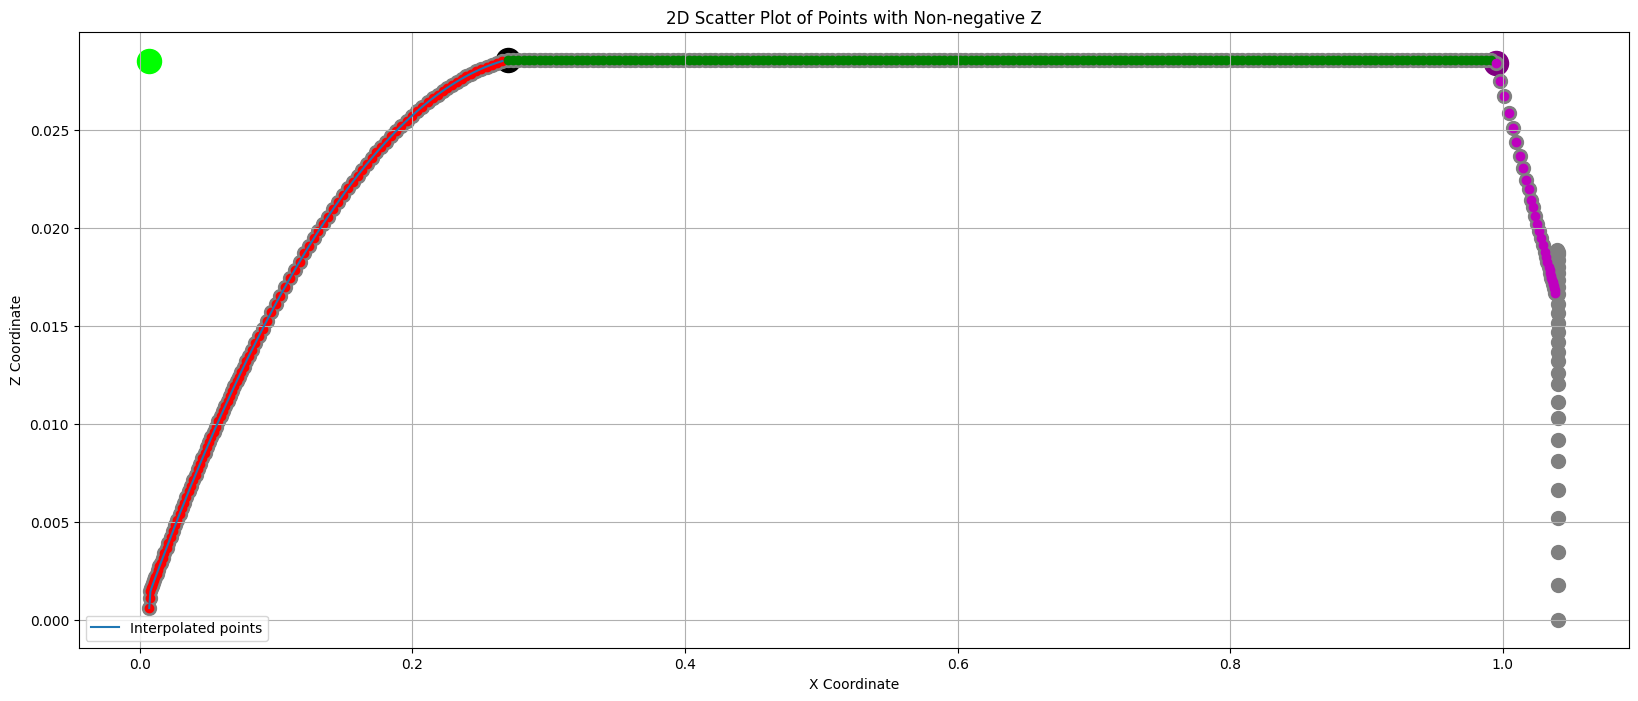

In [53]:
X = [0.00687989,
        0.02538618,
        0.04389248,
        0.06239877,
        0.08090506,
        0.09941136,
        0.11791765,
        0.13642394,
        0.15493024,
        0.17343653,
        0.19194283,
        0.21044912,
        0.22895541,
        0.24746171,
        0.265968]

R = [0.00060894,
        0.00473692,
        0.00791868,
        0.0108706,
        0.01359381,
        0.01609096,
        0.01836168,
        0.02040854,
        0.02223147,
        0.02383242,
        0.02521021,
        0.0263657,
        0.02730122,
        0.02801459,
        0.0285089]

plt.figure(figsize=(20, 8))
#plt.scatter(X,R, s=300, marker='o',color='k')
#plt.scatter(df_positive_z["Points_0"].min(),df_positive_z["Points_2"].max(),s=300,color='r')
plt.scatter(df_positive_nose["Points_0"].min(),df_positive_nose["Points_2"].max(),s=300,color='lime')
plt.scatter(df_positive_body["Points_0"].min(),df_positive_body["Points_2"].max(),s=300,color='black')
plt.scatter(df_positive_aft["Points_0"].min(),df_positive_aft["Points_2"].max(),s=300,color='purple')
plt.scatter(df_positive_z['Points_0'],    df_positive_z['Points_2'],    s=100, color='gray')
plt.scatter(df_positive_nose['Points_0'], df_positive_nose['Points_2'], color='r')
plt.scatter(df_positive_body['Points_0'], df_positive_body['Points_2'], color='g')
plt.scatter(df_positive_aft['Points_0'],  df_positive_aft['Points_2'],  color='m')
plt.plot(x_new, y_new, '-', label='Interpolated points')
plt.xlabel('X Coordinate')
plt.ylabel('Z Coordinate')
plt.title('2D Scatter Plot of Points with Non-negative Z')
plt.legend()
plt.grid()
plt.show()